# LECON tweet disaster

In [0]:
# Importar bibliotecas
import pandas as pd

In [0]:
# Ler os dados
tttr = pd.read_csv("train.csv", encoding='latin-1')
tttt = pd.read_csv("test.csv", encoding='latin-1')

In [0]:
tttr.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
tttr = tttr[['text', 'target']]
tttr.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
tttr.isnull().sum()

text      0
target    0
dtype: int64

In [0]:
tttr.target = tttr.target.astype(str)

In [0]:
tttr.describe()

,text,target
count,7613,7613
unique,7503,2
top,11-Year-Old Boy Charged With Manslaughter of T...,0
freq,10,4342


In [0]:
tttr['tt_len'] = tttr.text.apply(len)


In [0]:
tttr.head()

,text,target,tt_len
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


Text(0.5, 0, 'Txt Length')

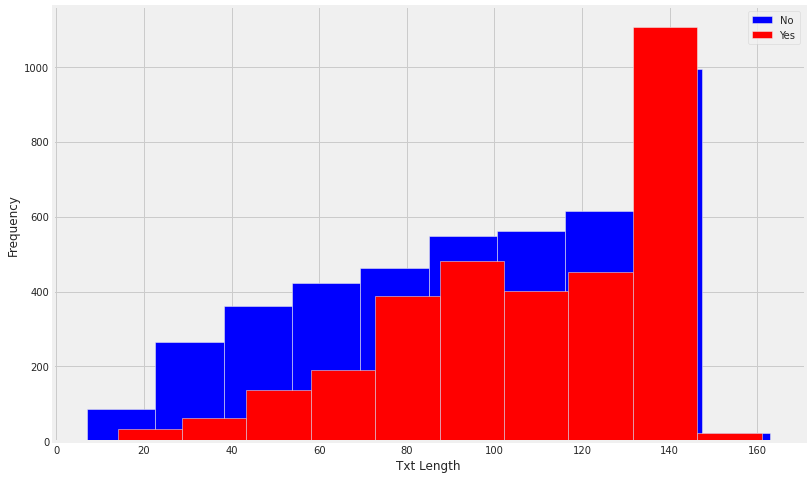

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

tttr[tttr.target=='0'].tt_len.plot(bins=10, kind='hist', 
                                          color='blue', 
                                          label='No')
tttr[tttr.target=='1'].tt_len.plot(kind='hist', color='red', 
                                           label='Yes')
plt.legend()
plt.xlabel("Txt Length")

In [0]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import string

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])


In [0]:
tttr['clean_tt'] = tttr.text.apply(text_process)

In [0]:
tttr['clean_tt']

0            Deeds Reason earthquake May ALLAH Forgive us
1                   Forest fire near La Ronge Sask Canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo Ruby Alaska smoke wildfires pou...
                              ...                        
7608    Two giant cranes holding bridge collapse nearb...
7609    ariaahrary TheTawniest control wild fires Cali...
7610    M194 0104 UTC5km Volcano Hawaii httptcozDtoyd8EbJ
7611    Police investigating ebike collided car Little...
7612    Latest Homes Razed Northern California Wildfir...
Name: clean_tt, Length: 7613, dtype: object

In [0]:
type(stopwords.words('english'))

list

In [0]:
# Vamos contar as palavras e colocar elas em minusculo
from collections import Counter

words = tttr[tttr.target=='0'].clean_tt.apply(lambda x: [word.lower() for word in x.split()])
no_tt_words = Counter()

for tw in words:
    no_tt_words.update(tw)
    
print(no_tt_words.most_common(50))

[('like', 253), ('amp', 192), ('new', 168), ('get', 163), ('one', 128), ('body', 112), ('via', 99), ('would', 97), ('video', 96), ('people', 91), ('love', 89), ('know', 85), ('back', 84), ('time', 83), ('us', 83), ('got', 83), ('see', 82), ('cant', 81), ('emergency', 81), ('full', 81), ('day', 78), ('youtube', 76), ('going', 75), ('still', 72), ('fire', 72), ('go', 67), ('want', 67), ('good', 67), ('think', 66), ('3', 64), ('man', 62), ('world', 62), ('lol', 61), ('rt', 60), ('life', 60), ('youre', 58), ('first', 58), ('news', 57), ('last', 56), ('burning', 56), ('really', 55), ('way', 55), ('need', 55), ('make', 54), ('work', 54), ('best', 53), ('let', 52), ('much', 51), ('many', 51), ('even', 51)]


In [0]:
words = tttr[tttr.target=='1'].clean_tt.apply(lambda x: [word.lower() for word in x.split()])
disas_words = Counter()

for tw in words:
    disas_words.update(tw)
    
print(disas_words.most_common(50))

[('fire', 178), ('news', 136), ('via', 121), ('disaster', 117), ('california', 111), ('suicide', 110), ('police', 107), ('amp', 106), ('people', 105), ('killed', 93), ('like', 92), ('hiroshima', 86), ('storm', 85), ('crash', 84), ('fires', 84), ('us', 81), ('families', 81), ('train', 79), ('emergency', 76), ('buildings', 75), ('bomb', 74), ('two', 71), ('mh370', 71), ('nuclear', 70), ('attack', 69), ('video', 69), ('wildfire', 69), ('get', 66), ('accident', 66), ('bombing', 66), ('one', 65), ('northern', 64), ('burning', 64), ('dead', 63), ('pm', 62), ('legionnaires', 62), ('bomber', 60), ('homes', 58), ('car', 57), ('still', 57), ('war', 57), ('new', 56), ('atomic', 56), ('obama', 54), ('fatal', 54), ('years', 53), ('collapse', 51), ('may', 50), ('forest', 50), ('debris', 50)]


In [0]:
tttr.head()

,text,target,tt_len,clean_tt
0,Our Deeds are the Reason of this #earthquake M...,1,69,Deeds Reason earthquake May ALLAH Forgive us
1,Forest fire near La Ronge Sask. Canada,1,38,Forest fire near La Ronge Sask Canada
2,All residents asked to 'shelter in place' are ...,1,133,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,65,13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo Ruby Alaska smoke wildfires pou...


In [0]:
X = tttr.clean_tt
y = tttr.target
print(X.shape)
print(y.shape)

(7613,)
(7613,)


In [0]:
X.head()

0         Deeds Reason earthquake May ALLAH Forgive us
1                Forest fire near La Ronge Sask Canada
2    residents asked shelter place notified officer...
3    13000 people receive wildfires evacuation orde...
4    got sent photo Ruby Alaska smoke wildfires pou...
Name: clean_tt, dtype: object

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5709,)
(1904,)
(5709,)
(1904,)


In [0]:
# Instanciando o vectorizer
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
# Aprendendo com o vocab (document-term matrix)
X_train_dtm = vect.transform(X_train)

In [0]:
X_train_dtm

<5709x18324 sparse matrix of type '<class 'numpy.int64'>'
	with 55103 stored elements in Compressed Sparse Row format>

In [0]:
# Teste
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1904x18324 sparse matrix of type '<class 'numpy.int64'>'
	with 13969 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<5709x18324 sparse matrix of type '<class 'numpy.float64'>'
	with 55103 stored elements in Compressed Sparse Row format>

In [0]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.neural_network import MLPClassifier
nnt = MLPClassifier()

In [0]:
# Treinar o modelo usando X_train_dtm 
%time 
nnt.fit(X_train_dtm, y_train)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.39 µs


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
# Class predictions para X_test_dtm
y_pred_class = nnt.predict(X_test_dtm)

In [0]:
# print the confusion matrix
import sklearn.metrics as m
print(m.confusion_matrix(y_test, y_pred_class))

[[924 167]
 [277 536]]


In [0]:
print(m.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1091
           1       0.76      0.66      0.71       813

    accuracy                           0.77      1904
   macro avg       0.77      0.75      0.76      1904
weighted avg       0.77      0.77      0.76      1904



In [0]:
y_test

3228    1
3706    0
6957    0
2887    0
7464    1
       ..
7351    0
997     0
3854    1
7120    1
524     0
Name: target, Length: 1904, dtype: object

In [0]:
yp = y_pred_class.astype(int)

In [0]:
print(m.roc_auc_score(y_test, yp))

0.7531080077070247
